In [1]:
# set logging level to include INFO
import logging
logging.basicConfig(level=20)

In [2]:
from rbc.point import Point
# from rbc.space import Space
from rbc.floorplan import FloorPlan
from rbc.room import Room
from shapely.geometry import Polygon

## Let's build a floor plan for an ADU

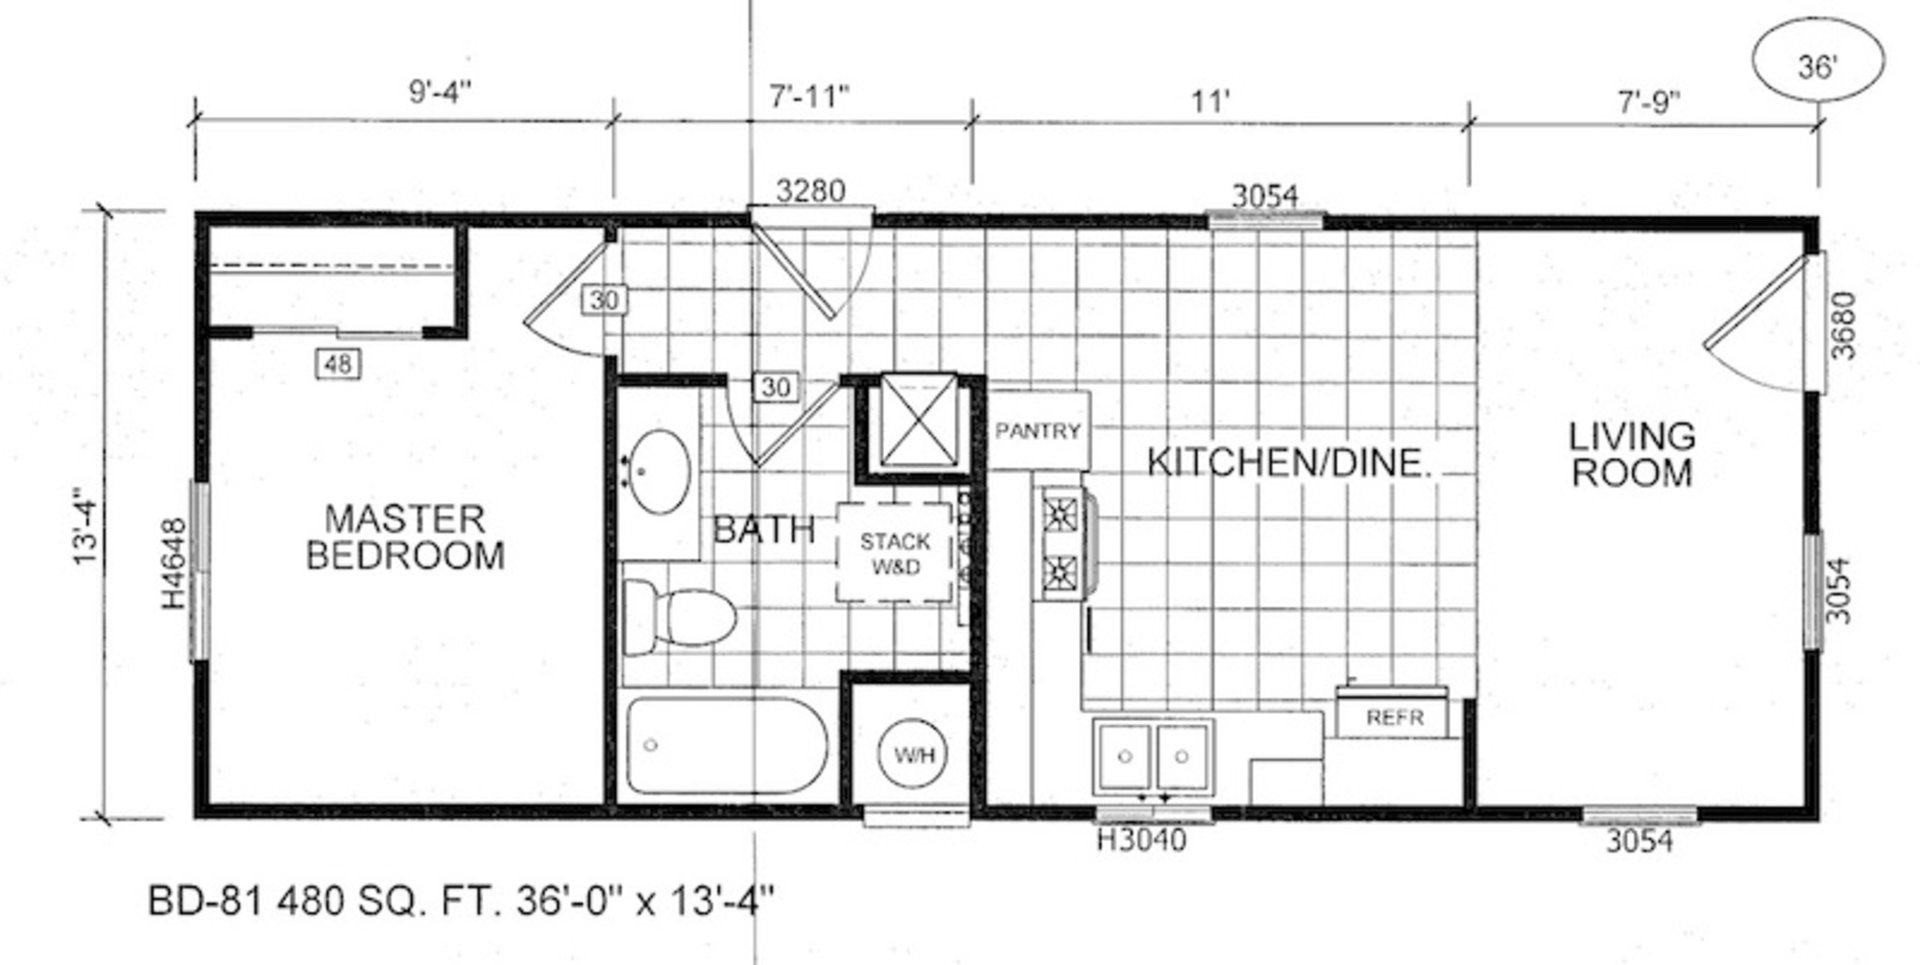

Image source: https://www.macyhomes.com/adu_floor_plans

### Creating the floor plan

We can define the rectangular space by defining four points. `Point`s are
defined by `(x, y, z)` coordinates.

In [3]:
# dimensions of exterior
a1 = Point(0, 0, 0)
a2 = Point(0, 13.333, 0)
a3 = Point(36, 13.333, 0)
a4 = Point(36, 0, 0)

We can create the `FloorPlan` like so:

In [4]:
adu = FloorPlan(name='ADU', points=[a1, a2, a3, a4])

We can check the area of the ADU by checking the `.area` attribute.

In [5]:
adu.area

479.988

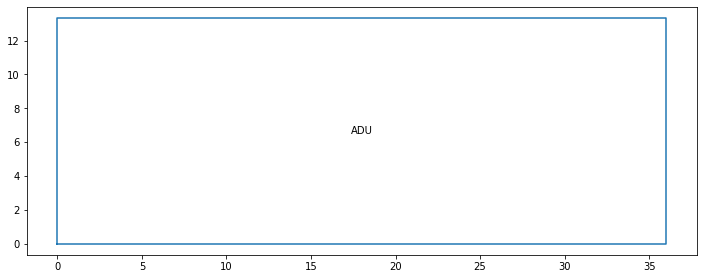

In [6]:
adu.plot()

This looks pretty good but it's missing the rooms shown in the image above.

### Creating the master bedroom

In [7]:
mb1 = Point(0, 0, 0)
mb2 = Point(0, 13.333, 0)
mb3 = Point(9.333, 13.333, 0)
mb4 = Point(9.333, 0, 0)

Creating a `Room` is similar to how `FloorPlan`s are created.

In [8]:
master_bedroom = Room(room_type='bedroom', name='Master Bedroom', points=[mb1, mb2, mb3, mb4])

In [9]:
master_bedroom.area

124.43688900000001

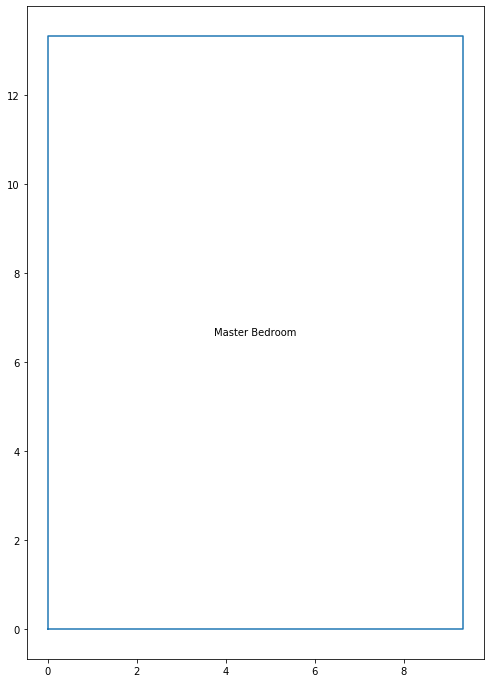

In [10]:
master_bedroom.plot()

In [11]:
adu.add_room(master_bedroom)

INFO:root:Successfully placed Master Bedroom.


Let's check our progress.

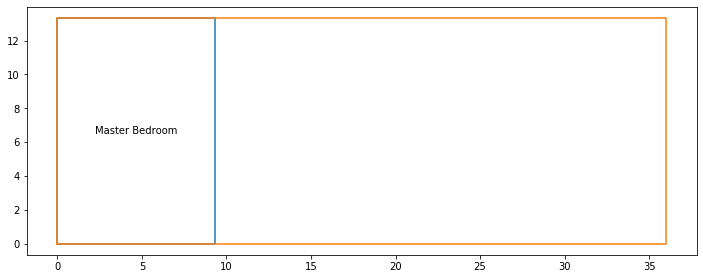

In [12]:
adu.plot()

### Creating the bathroom

In [13]:
b1 = Point(0, 0, 0)
b2 = Point(0, 9.833, 0)
b3 = Point(7.917, 9.833, 0)
b4 = Point(7.917, 0, 0)

bathroom = Room(room_type='bathroom', name='Bathroom', points=[b1, b2, b3, b4])

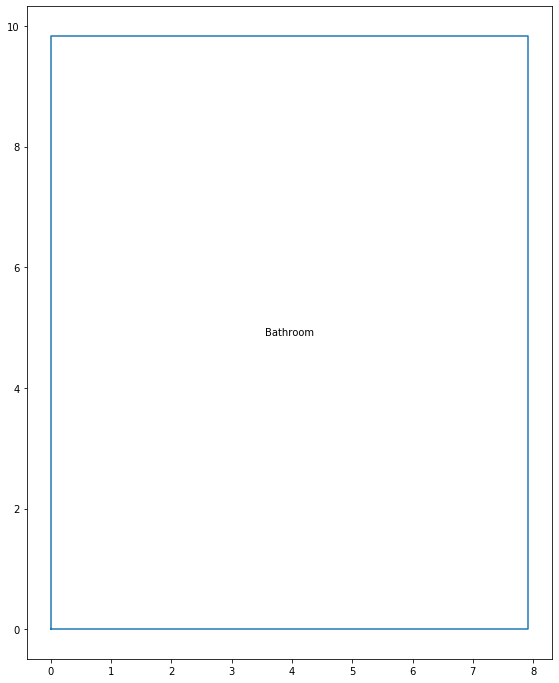

In [14]:
bathroom.plot()

### Creating the kitchen

In [15]:
k1 = Point(0, 0, 0)
k2 = Point(0, 13.333, 0)
k3 = Point(11, 13.333, 0)
k4 = Point(11, 0, 0)

kitchen = Room(room_type='kitchen', name='Kitchen', points=[k1, k2, k3, k4])

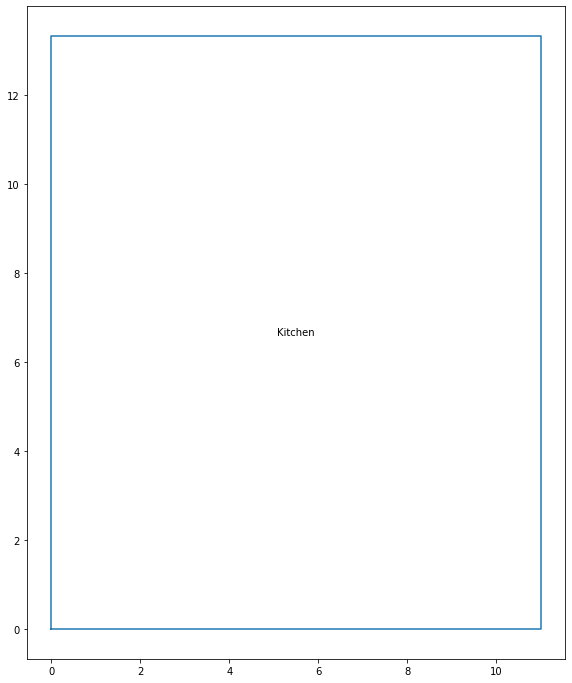

In [16]:
kitchen.plot()

In [17]:
adu.add_room(bathroom, x_offset=9.333)

INFO:root:Successfully placed Bathroom.


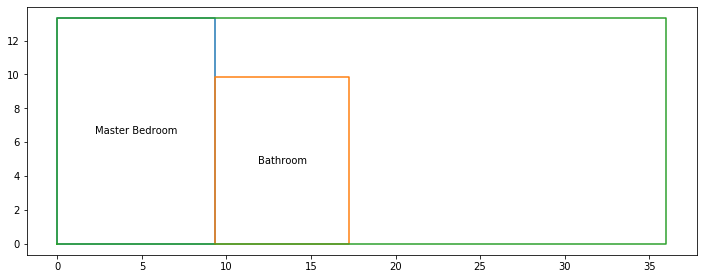

In [18]:
adu.plot()

In [19]:
adu.add_room(kitchen, x_offset=17.25)

INFO:root:Successfully placed Kitchen.


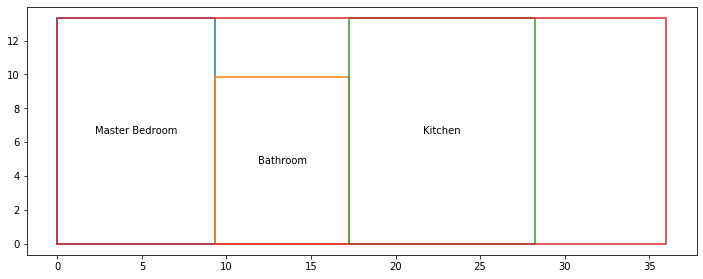

In [20]:
adu.plot()

Great! We now have an accurate visual of the floor plan. Because each
component is a data object, we can easily get a summary of information about
our floor plan

In [21]:
adu.plan

{'Master Bedroom': Space: Master Bedroom, AREA: 124.43688900000001,
 'Bathroom': Space: Bathroom, AREA: 77.847861,
 'Kitchen': Space: Kitchen, AREA: 146.663}

In [22]:
adu.room_count()

Counter({'bedroom': 1, 'bathroom': 1, 'kitchen': 1})

In [23]:
adu.plan_summary()

{'bedroom': 124.43688900000001, 'bathroom': 77.847861, 'kitchen': 146.663}

### Procedurally-generate a floor plan

In [24]:
pg_adu = FloorPlan(rooms=[master_bedroom, kitchen, bathroom], name='Procedurally Generated ADU', 
                   points=[a1, a2, a3, a4])

INFO:root:Contents found: [Space: Master Bedroom, AREA: 124.43688900000001, Space: Kitchen, AREA: 146.663, Space: Bathroom, AREA: 77.847861]
INFO:root:Failed to place Kitchen. Retrying...
INFO:root:Failed to place Kitchen. Retrying...
INFO:root:Failed to place Kitchen. Retrying...
INFO:root:Failed to place Kitchen. Retrying...
INFO:root:Failed to place Bathroom. Retrying...
INFO:root:Failed to place Bathroom. Retrying...
INFO:root:Failed to place Bathroom. Retrying...
INFO:root:Failed to place Bathroom. Retrying...
INFO:root:Failed to place Bathroom. Retrying...
INFO:root:Failed to place Bathroom. Retrying...
INFO:root:Failed to place Bathroom. Retrying...


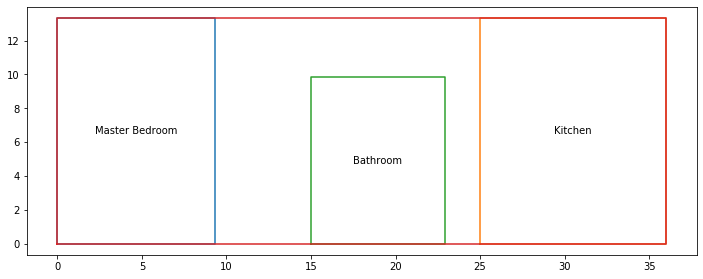

In [25]:
pg_adu.plot()